$\Huge{\text{Linear Regression with Regularizers Using Scikit-learn}}$

In this session, we shall learn about linear regression when we impose regularizers on the parameters. 

Let us first consider a sample data, which will be useful for our study of linear regression with regularizers. 

In [1]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import numpy as np 
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet. The data set we will consider represents miles per gallon for different car models as a response variable dependent on multiple attributes.


In [2]:
#Let us explore the data and the description 

#Get the data from the web 
auto_mpg_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
auto_mpg_data.head()


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
#if you wish to print the entire data, then use the following
auto_mpg_data

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


What do the numbers in the above data mean? Let us understand the data by seeing its description. 

In [4]:
import urllib.request  #this package is useful for accessing text files over internet 
drug_vs_mathscore_data_description_file = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names')


for line in drug_vs_mathscore_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

1. Title: Auto-Mpg Data



2. Sources:

   (a) Origin:  This dataset was taken from the StatLib library which is

                maintained at Carnegie Mellon University. The dataset was 

                used in the 1983 American Statistical Association Exposition.

   (c) Date: July 7, 1993



3. Past Usage:

    -  See 2b (above)

    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.

       In Proceedings on the Tenth International Conference of Machine 

       Learning, 236-243, University of Massachusetts, Amherst. Morgan

       Kaufmann.



4. Relevant Information:



   This dataset is a slightly modified version of the dataset provided in

   the StatLib library.  In line with the use by Ross Quinlan (1993) in

   predicting the attribute "mpg", 8 of the original instances were removed 

   because they had unknown values for the "mpg" attribute.  The original 

   dataset is available in the file "auto-mpg.data-original".



   "The data concerns cit

Having known the data description, let us insert the descriptions into the data now.

In [5]:
auto_mpg_data.columns = ['mpg', 'cylinders', 'displacement','horsepower', 'weight','acceleration','model year','origin','car-name']


#check by printing the data again
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car-name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
auto_mpg_data.describe(include=object)

,horsepower,car-name
count,398,398
unique,94,305
top,150.0,ford pinto
freq,22,6


In [7]:
auto_mpg_data[auto_mpg_data['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car-name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [8]:
# auto_mpg_data = auto_mpg_data.astype(float)

In [9]:
auto_mpg_data = auto_mpg_data.replace('?',np.nan)
auto_mpg_data = auto_mpg_data.dropna()
auto_mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car-name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [10]:
# Remove Car name column in given dataset
TOC_column = auto_mpg_data.pop('car-name') #collect the contents of TOC  column into a temporary object 

auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
#Let us now number of data
n = len(auto_mpg_data.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 392


In [12]:
#extract the predictor variable columns 
cols = [1,2,3,4,5,6,7]
X_data = auto_mpg_data[auto_mpg_data.columns[cols]]

X_data

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.00,2790.0,15.6,82,1
394,4,97.0,52.00,2130.0,24.6,82,2
395,4,135.0,84.00,2295.0,11.6,82,1
396,4,120.0,79.00,2625.0,18.6,82,1


In [13]:
# DataFrame on predictor variable columns
response_cols = [0]
Y_data = auto_mpg_data[auto_mpg_data.columns[response_cols]]
Y_data

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


# Data Splitting

In [14]:
# Split Dataset into train and test dataset using sklearn
from sklearn.model_selection import train_test_split
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=200)
print(len(X_train_initial), len(X_test), len(y_train_initial), len(y_test))

313 79 313 79


In [15]:
# Split Dataset into train and Validation dataset using sklearn
X_train, X_val, y_train, y_val = train_test_split(X_train_initial, y_train_initial, test_size=0.2, random_state=200)
print(len(X_train), len(X_val), len(y_train), len(y_val))

250 63 250 63


# **Implement Ridge Regression**

In [16]:
# impoet linear Regression with L2 Regularization from Sklearn
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

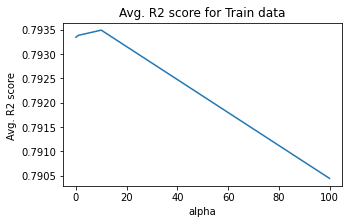

In [17]:
# Implement Ridge Regression 
alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]
plt.figure(figsize=(5, 3))

scores = [cross_val_score(Ridge(alpha), X_train, y_train, cv=5).mean()
        for alpha in alphas]
        
plt.plot(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('Avg. R2 score ')
plt.title("Avg. R2 score for Train data")
plt.show()

# For validation Data

In [18]:
alphas = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]
val_score=[]
for alpha in alphas:
  print("alpha = ", alpha)
  ridge = Ridge(alpha=alpha) 
  ridge.fit(X_train,y_train)  
  for i,col in enumerate(X_train.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))
  pred_val = ridge.predict(X_val)   # predict value of X train dataset
  val_score.append(ridge.score(X_val, y_val))
  print("R2_score = ",ridge.score(X_val, y_val))
  print("mse_score = ",mean_squared_error(y_val, pred_val),"\n")

alpha =  1e-05
Ridge model coefficients for cylinders is -0.10742194085595155:
Ridge model coefficients for displacement is 0.013750490956536812:
Ridge model coefficients for horsepower is -0.013909630212010488:
Ridge model coefficients for weight is -0.00653116892176334:
Ridge model coefficients for acceleration is 0.18634277150320794:
Ridge model coefficients for model year is 0.7725746689046057:
Ridge model coefficients for origin is 1.3451330196942373:
R2_score =  0.8141337043745758
mse_score =  11.86760184417045 

alpha =  0.0001
Ridge model coefficients for cylinders is -0.10742157060905688:
Ridge model coefficients for displacement is 0.013750473739408256:
Ridge model coefficients for horsepower is -0.013909612066430368:
Ridge model coefficients for weight is -0.006531169163705023:
Ridge model coefficients for acceleration is 0.18634274874858087:
Ridge model coefficients for model year is 0.7725746593968702:
Ridge model coefficients for origin is 1.3451316256131578:
R2_score =  

**Graph between $R^2$ and $alpha$ values for training and validation data-**

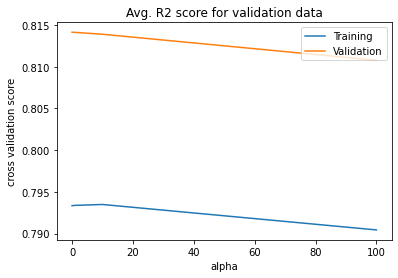

In [19]:
plt.plot(alphas, scores,label="Training")
plt.plot(alphas, val_score,label="Validation")
plt.legend(loc='upper right')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.title("Avg. R2 score for validation data")
plt.show()

**Taking best alpha = 0.00001**

# Evaluating the performance on test data

---



In [20]:
best_alpha = 1e-5
ridge = Ridge(alpha=best_alpha) 
ridge.fit(X_train_initial,y_train_initial)  
for i,col in enumerate(X_train.columns):   
  print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))
pred_test = ridge.predict(X_test)   # predict value of X train dataset
print("test_score = ",ridge.score(X_test, y_test))
print("mse_score = ",mean_squared_error(y_test, pred_test),"\n")

Ridge model coefficients for cylinders is -0.17194200903621282:
Ridge model coefficients for displacement is 0.017745796949372006:
Ridge model coefficients for horsepower is -0.011558358036469768:
Ridge model coefficients for weight is -0.006907409650832258:
Ridge model coefficients for acceleration is 0.14551927214299262:
Ridge model coefficients for model year is 0.7573610429118091:
Ridge model coefficients for origin is 1.3706757721522298:
test_score =  0.8135494136683775
mse_score =  11.306014613818332 



$\Large{\text{References:}}$



1.   Olive J. David, $\textit{Linear Regression}$. Springer International Publishing,  2017.
2.   Sanford Weisberg. $\textit{Applied Linear Regression}$. John Wiley $\&$ Sons, Inc., Hoboken, New Jersey, 4-th Edition, 2014.

